# Exploratory and Explanatory Data Analysis (and Cleaning)

In [ ]:
# Importing packages
import polars as pl

from project_d100.data import load_data, summary, extract_day, denormalise, denormalise_temp, ren_year, move_col, check_sum
from project_d100.visualisations import plot_corr, plot_cramerv, plot_count, plot_dist, plot_box, plot_pairs, plot_histogram, plot_kde

In [2]:
# Configure the display of tables
pl.Config.set_tbl_width_chars(200)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(10)

polars.config.Config

## EDA: Part 1

In [3]:
# Load data and basic visualisation
df_unclean = load_data()
df_unclean.head(n=5)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
i64,str,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,i64
1,"""2011-01-01""",1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,"""2011-01-01""",1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0.0,8,32,40
3,"""2011-01-01""",1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0.0,5,27,32
4,"""2011-01-01""",1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,"""2011-01-01""",1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Summary of the data
summary(df_unclean)


Data Shape (rows, columns)
(17379, 17)

Data Types
instant: Int64
dteday: String
season: Int64
yr: Int64
mnth: Int64
hr: Int64
holiday: Int64
weekday: Int64
workingday: Int64
weathersit: Int64
temp: Float64
atemp: Float64
hum: Float64
windspeed: Float64
casual: Int64
registered: Int64
cnt: Int64

Missing Values
shape: (1, 17)
┌─────────┬────────┬────────┬─────┬──────┬─────┬─────────┬─────────┬────────────┬────────────┬──────┬───────┬─────┬───────────┬────────┬────────────┬─────┐
│ instant ┆ dteday ┆ season ┆ yr  ┆ mnth ┆ hr  ┆ holiday ┆ weekday ┆ workingday ┆ weathersit ┆ temp ┆ atemp ┆ hum ┆ windspeed ┆ casual ┆ registered ┆ cnt │
│ ---     ┆ ---    ┆ ---    ┆ --- ┆ ---  ┆ --- ┆ ---     ┆ ---     ┆ ---        ┆ ---        ┆ ---  ┆ ---   ┆ --- ┆ ---       ┆ ---    ┆ ---        ┆ --- │
│ u32     ┆ u32    ┆ u32    ┆ u32 ┆ u32  ┆ u32 ┆ u32     ┆ u32     ┆ u32        ┆ u32        ┆ u32  ┆ u32   ┆ u32 ┆ u32       ┆ u32    ┆ u32        ┆ u32 │
╞═════════╪════════╪════════╪═════╪══════╪═════

## Cleaning:
- season, year, and mnth features were extracted from dteday -> extract day, then drop dteday
- renaming 0 and 1 in yr to 2011 and 2012 - decreases confusion in the future
- The following features need to be turned into categoricals: season, year, mnth, hr, holiday, weekday, workingday, weathersit (review again after visualisation)
- De-normalise data for following features: temp (41), atemp (50), hum (100), windspeed (67)
    - According to Readme.txt, they normalised data by dividing by max values (in the parentheses above)

### Other points:
- no missing values
- no duplicates

In [5]:
# Extracting the day from the date; moving the day column next to other time features
df_unclean = extract_day(df_unclean, "dteday")
df_unclean = move_col(df_unclean, "day", 4)

In [6]:
# Renaming the year values
df_unclean = ren_year(df_unclean, "yr")

In [7]:
summary(df_unclean)


Data Shape (rows, columns)
(17379, 17)

Data Types
instant: Int64
season: Int64
yr: Int32
mnth: Int64
day: Int8
hr: Int64
holiday: Int64
weekday: Int64
workingday: Int64
weathersit: Int64
temp: Float64
atemp: Float64
hum: Float64
windspeed: Float64
casual: Int64
registered: Int64
cnt: Int64

Missing Values
shape: (1, 17)
┌─────────┬────────┬─────┬──────┬─────┬─────┬─────────┬─────────┬────────────┬────────────┬──────┬───────┬─────┬───────────┬────────┬────────────┬─────┐
│ instant ┆ season ┆ yr  ┆ mnth ┆ day ┆ hr  ┆ holiday ┆ weekday ┆ workingday ┆ weathersit ┆ temp ┆ atemp ┆ hum ┆ windspeed ┆ casual ┆ registered ┆ cnt │
│ ---     ┆ ---    ┆ --- ┆ ---  ┆ --- ┆ --- ┆ ---     ┆ ---     ┆ ---        ┆ ---        ┆ ---  ┆ ---   ┆ --- ┆ ---       ┆ ---    ┆ ---        ┆ --- │
│ u32     ┆ u32    ┆ u32 ┆ u32  ┆ u32 ┆ u32 ┆ u32     ┆ u32     ┆ u32        ┆ u32        ┆ u32  ┆ u32   ┆ u32 ┆ u32       ┆ u32    ┆ u32        ┆ u32 │
╞═════════╪════════╪═════╪══════╪═════╪═════╪═════════╪═════════

In [8]:
# Denormalising data
normalised_cols = {"hum" : 100, "windspeed" : 67}
for col, value in normalised_cols.items():
    df_unclean = denormalise(df_unclean, col, value)

In [9]:
# Denormalising temperature based on tranformation from the data description
df_unclean = denormalise_temp(df_unclean, "temp", t_max = 39, t_min = -8)
df_unclean = denormalise_temp(df_unclean, "atemp", t_max = 50, t_min = -16)

In [10]:
# Reorganising columns for easier visualisation - target variable first
df_unclean = move_col(df_unclean, "cnt", 1)
df_unclean = move_col(df_unclean, "casual", 2)
df_unclean = move_col(df_unclean, "registered", 3)

## EDA: Part 2

In [11]:
summary(df_unclean)


Data Shape (rows, columns)
(17379, 17)

Data Types
instant: Int64
cnt: Int64
casual: Int64
registered: Int64
season: Int64
yr: Int32
mnth: Int64
day: Int8
hr: Int64
holiday: Int64
weekday: Int64
workingday: Int64
weathersit: Int64
temp: Float64
atemp: Float64
hum: Float64
windspeed: Float64

Missing Values
shape: (1, 17)
┌─────────┬─────┬────────┬────────────┬────────┬─────┬──────┬─────┬─────┬─────────┬─────────┬────────────┬────────────┬──────┬───────┬─────┬───────────┐
│ instant ┆ cnt ┆ casual ┆ registered ┆ season ┆ yr  ┆ mnth ┆ day ┆ hr  ┆ holiday ┆ weekday ┆ workingday ┆ weathersit ┆ temp ┆ atemp ┆ hum ┆ windspeed │
│ ---     ┆ --- ┆ ---    ┆ ---        ┆ ---    ┆ --- ┆ ---  ┆ --- ┆ --- ┆ ---     ┆ ---     ┆ ---        ┆ ---        ┆ ---  ┆ ---   ┆ --- ┆ ---       │
│ u32     ┆ u32 ┆ u32    ┆ u32        ┆ u32    ┆ u32 ┆ u32  ┆ u32 ┆ u32 ┆ u32     ┆ u32     ┆ u32        ┆ u32        ┆ u32  ┆ u32   ┆ u32 ┆ u32       │
╞═════════╪═════╪════════╪════════════╪════════╪═════╪══════╪═══

In [12]:
# Checking for inconsistencies in the target variable
check_sum(df_unclean, "cnt", "casual", "registered")

In [13]:
# Dropping the casual and registered columns
df_unclean = df_unclean.drop(["casual", "registered"])

## EDA: Visualisations

### Target Variable

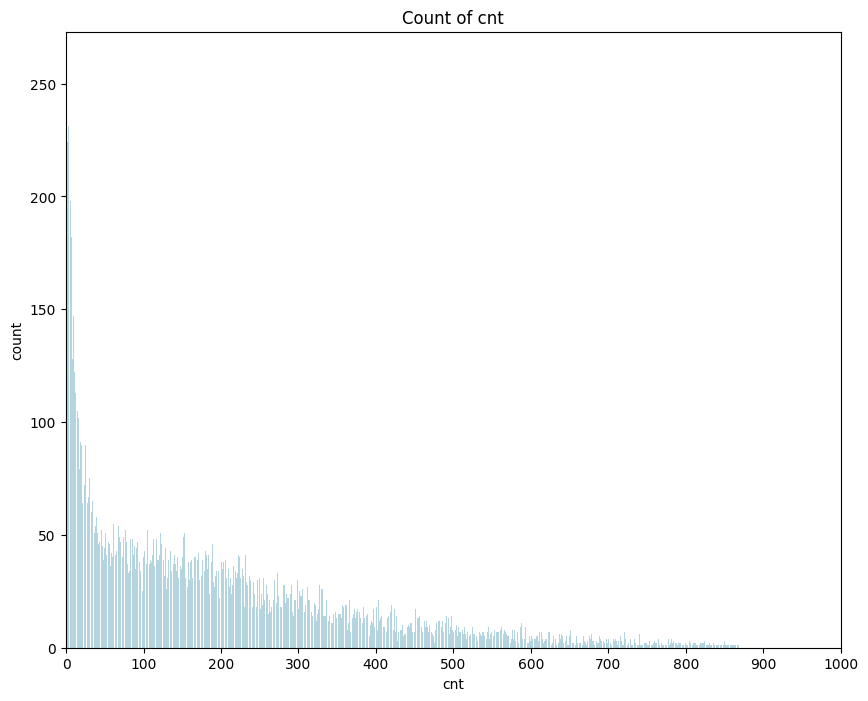

In [14]:
# Count plot to look at the distribution of the target variable
plot_count(df_unclean, "cnt", xticks = (0,1000))

/Users/govindniravrao/miniconda3/envs/project_d100/lib/python3.13/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and crashes.

The most likely reason you are seeing this error is because you are using the
multiprocessing module on Linux, which uses fork() by default. This will be
fixed in Python 3.14. Until then, you want to use the "spawn" context instead.

See https://docs.pola.rs/user-guide/misc/multiprocessing/ for details.

If you really know what your doing, you can silence this warning with the warning module
or by setting POLARS_ALLOW_FORKING_THREAD=1.

  pid = os.fork()
2024-12-13 15:47:50.984 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=5.9e-05)
2024-12-13 15:47:50.987 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distributio

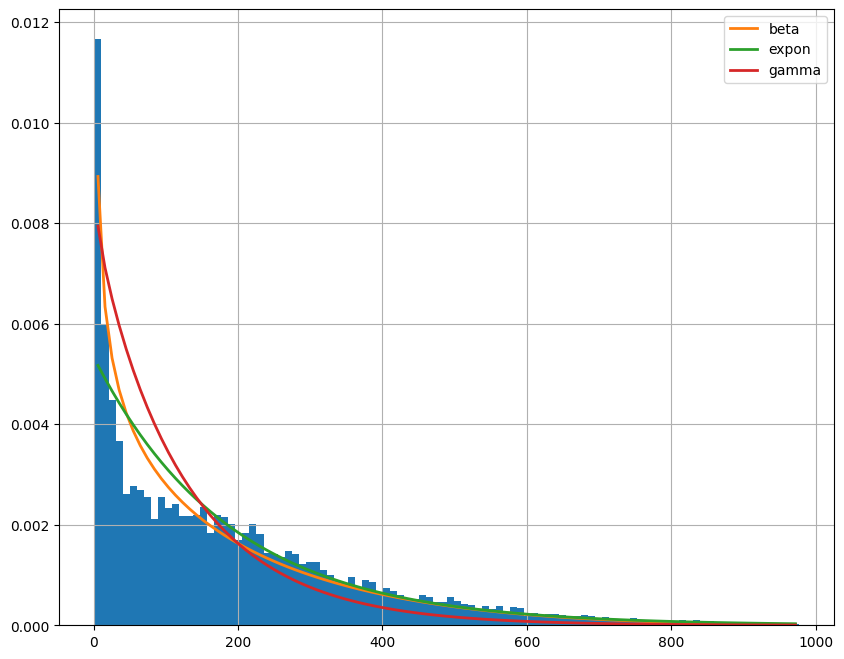

In [15]:
# Superimposed histogram and KDE plot for the target variable
plot_dist(df_unclean, "cnt", dist = ["gamma", "expon", "beta"])

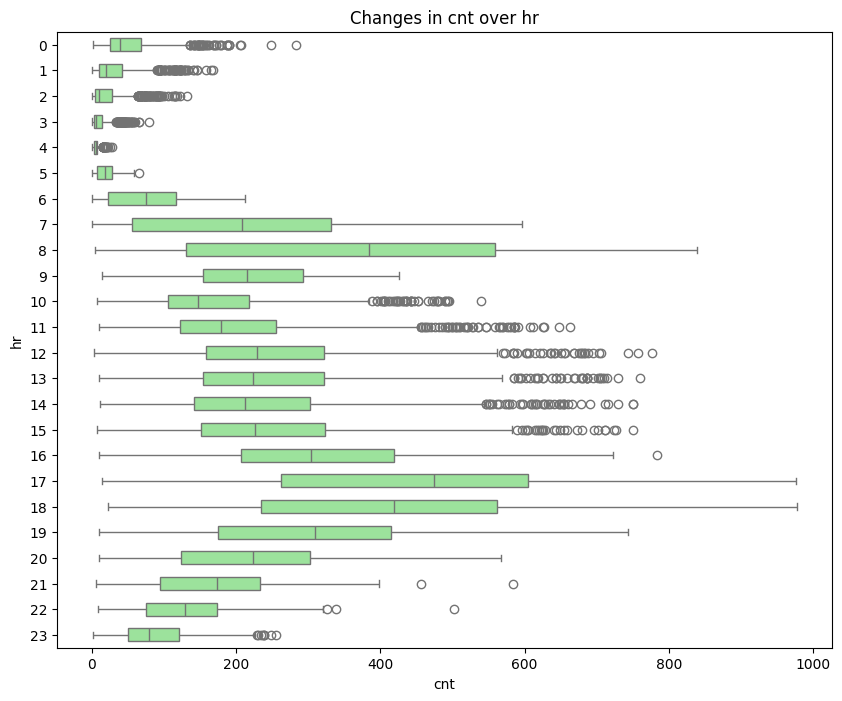

In [16]:
plot_box(df_unclean, y_var = "hr", x_var = "cnt")

### Numericals

- Using pairplots because they are all weather-related features
- Likely they are related

/Users/govindniravrao/miniconda3/envs/project_d100/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/govindniravrao/miniconda3/envs/project_d100/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/govindniravrao/miniconda3/envs/project_d100/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/govindniravrao/miniconda3/envs/project_d100/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/govindniravrao/miniconda3/envs/project_d100/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` be

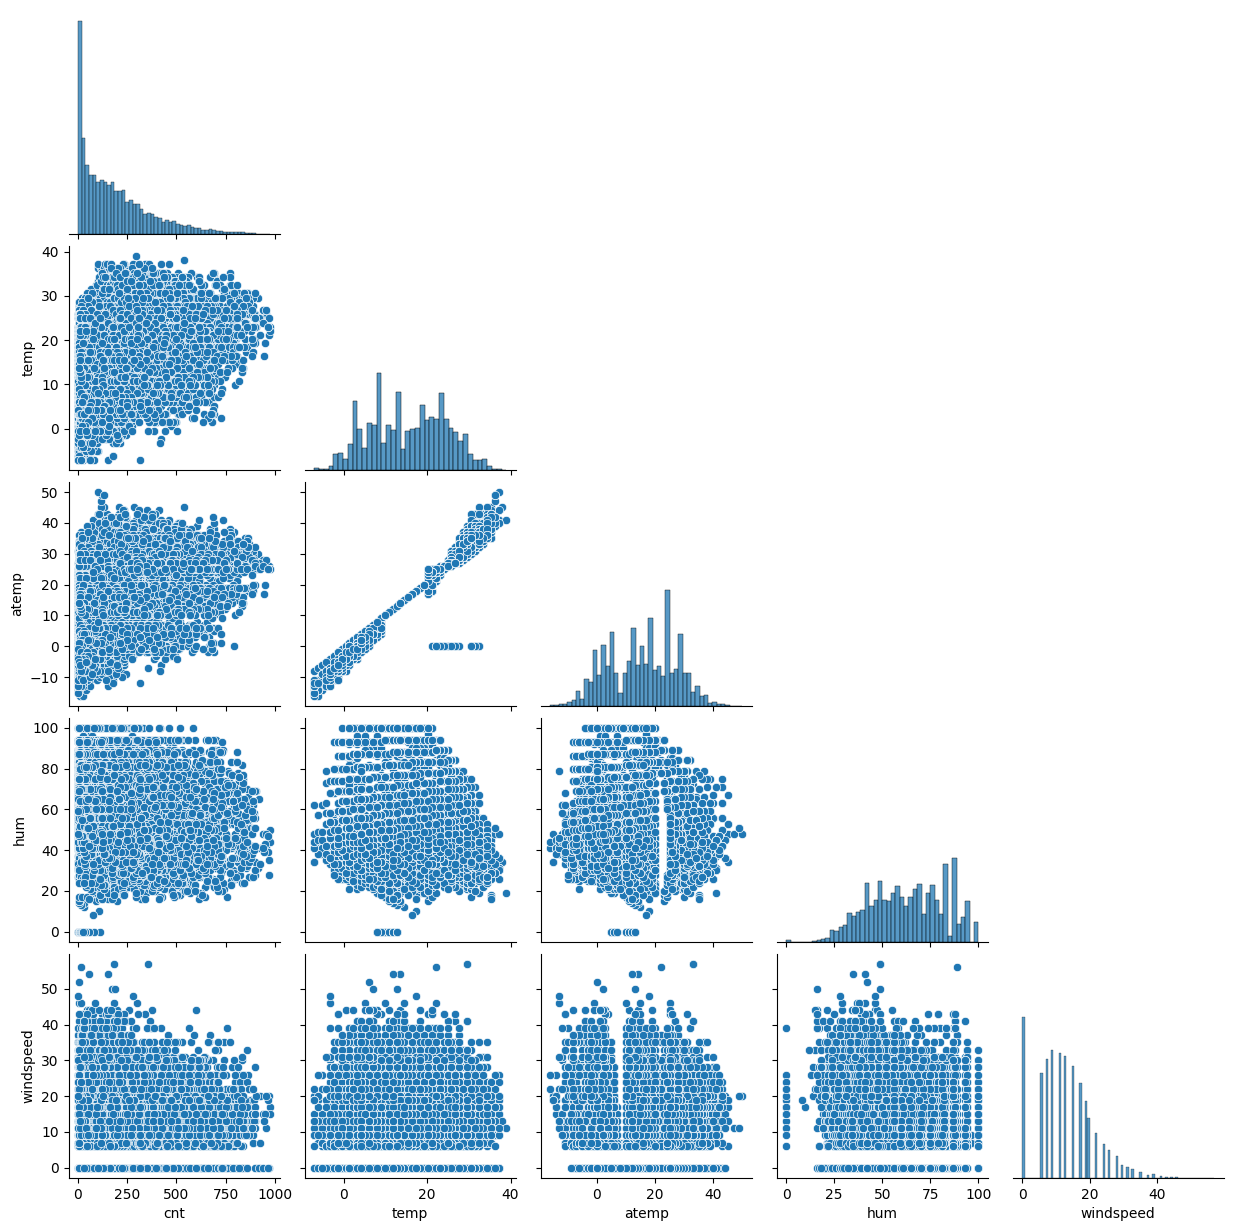

In [17]:
numericals = ["cnt", "temp", "atemp", "hum", "windspeed"]
plot_pairs(df_unclean, vars = numericals)

- Dataset does not specify the difference between temp and atemp, more specifically, how atemp is derived
- I will not drop it for the time being, but it is likely one of them will be dropped by the model

### Humidity

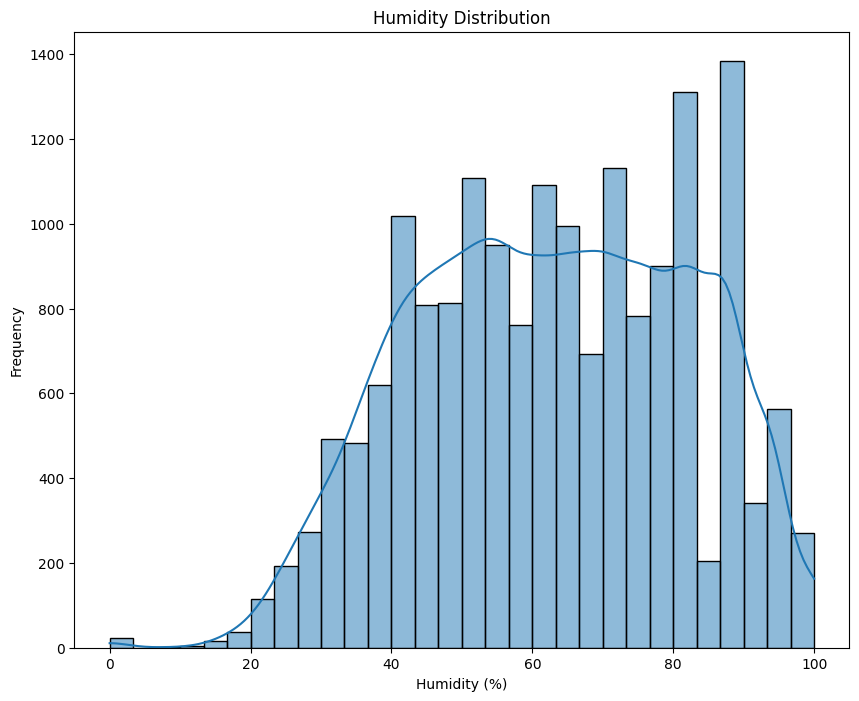

In [18]:
# Looking deeper into humidity
plot_histogram(df_unclean, "hum", bins = 30, title = "Humidity Distribution", xlabel = "Humidity (%)")

Dropping hum because:
- 0% humidity is impossible in Washington, so is anything below at least 50%
- 100% humidity also occurs (which is impossible, at least at this frequency)
- There are many observations of this sort
- No proper function of normalisation so there is either:
    - A problem with the data collection
    - An unknown normalisation function

Either way, dropping the data is the best course of action

In [19]:
df_unclean = df_unclean.drop("hum")

### Correlation

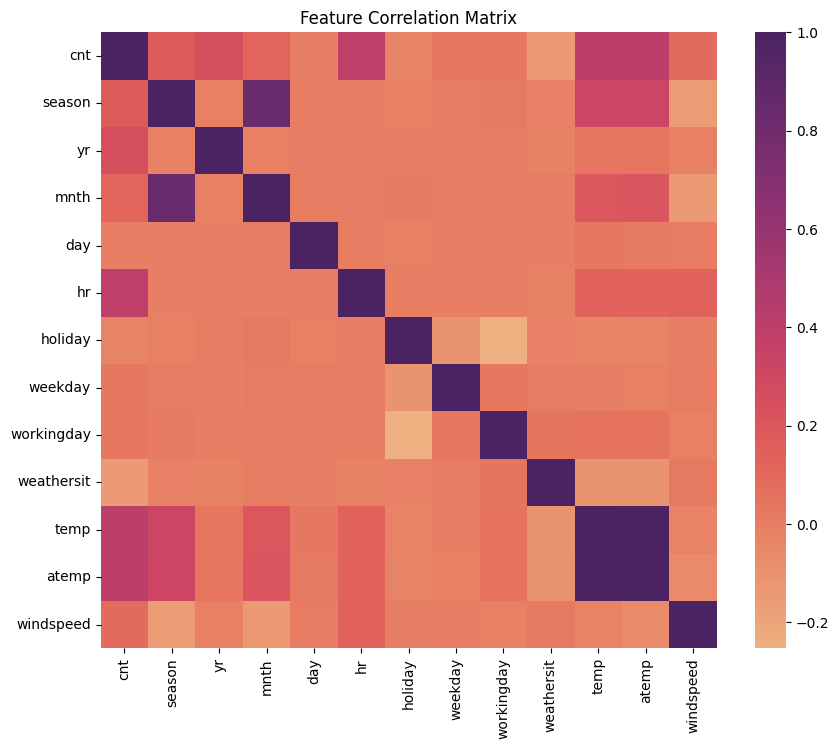

In [20]:
plot_corr(df_unclean, "instant")

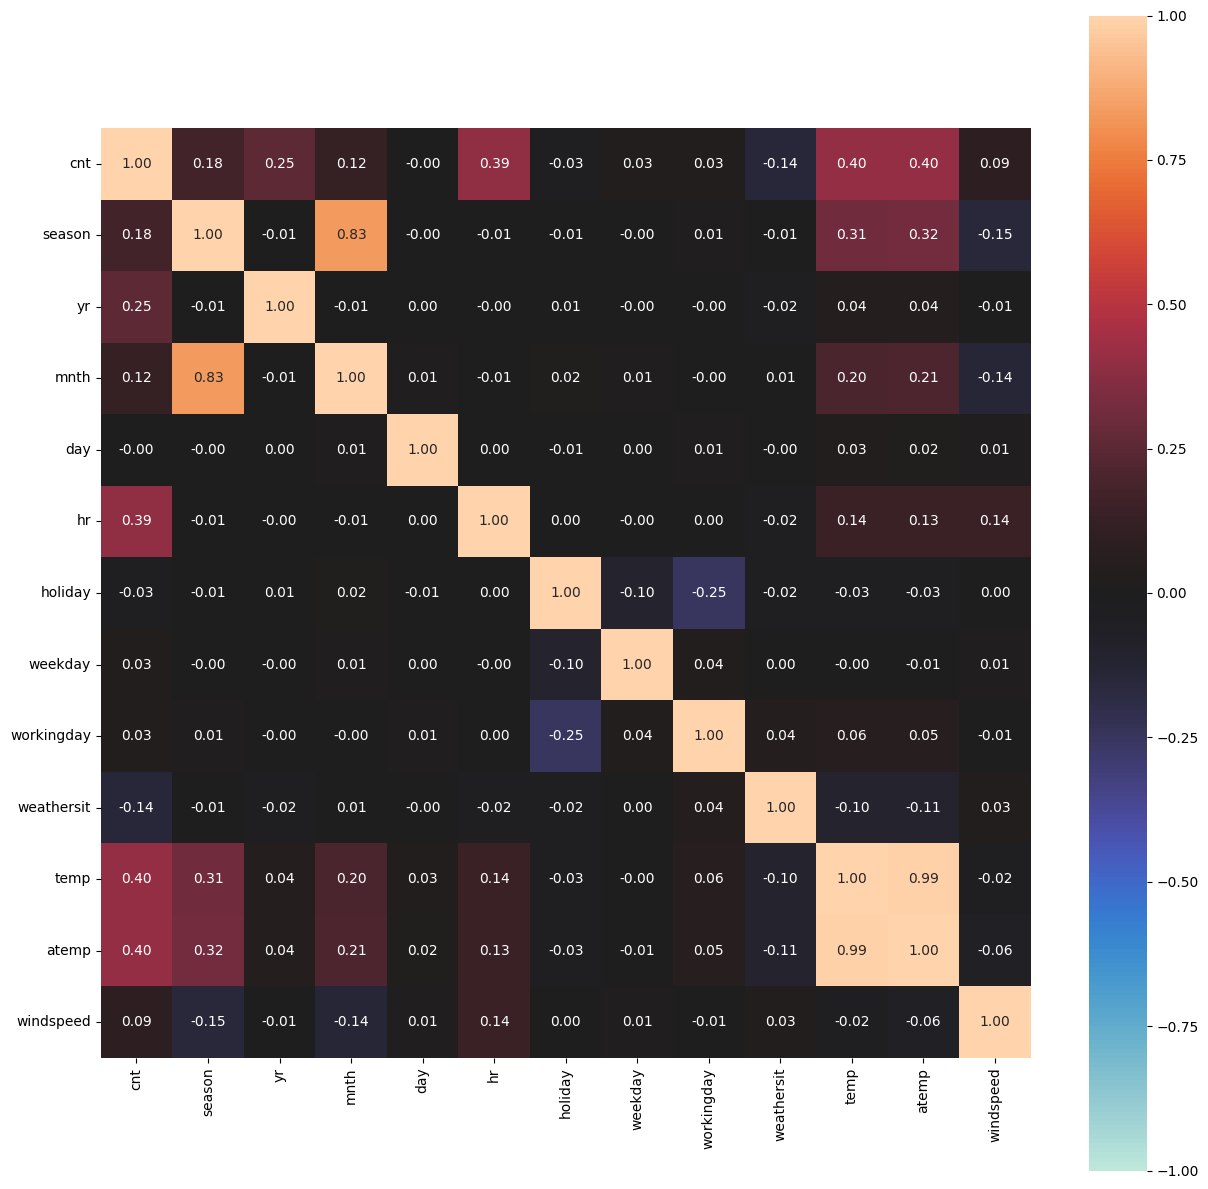

In [21]:
plot_cramerv(df_unclean, index_var = "instant")

Calculated Cramer's V for all the categoricals, similar values to those in correlation matrix

### Analysing features weakly correlated with cnt:
- day
- weekday
- holiday
- workingday
- weathersit

### Day

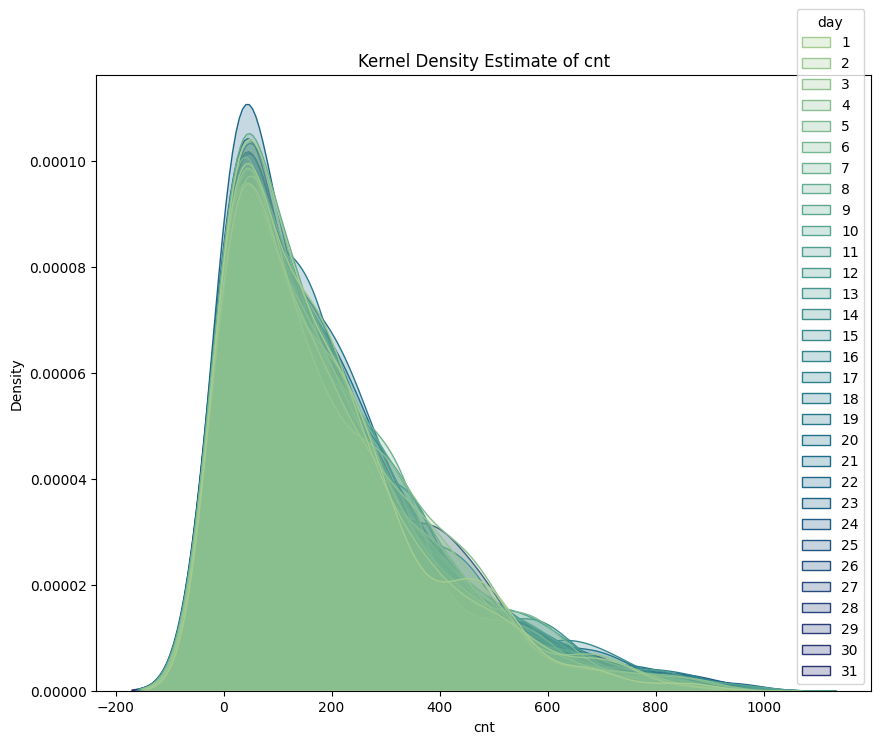

In [22]:
plot_kde(df_unclean, "cnt", hue="day")

Dropping day because:
- the KDE of cnt remains approximately the same despite the day - there is little within day variation that can be seen
- this is unlikely to be because of too few observations - there are observations of every hour in every day for 2 years

### Weekday

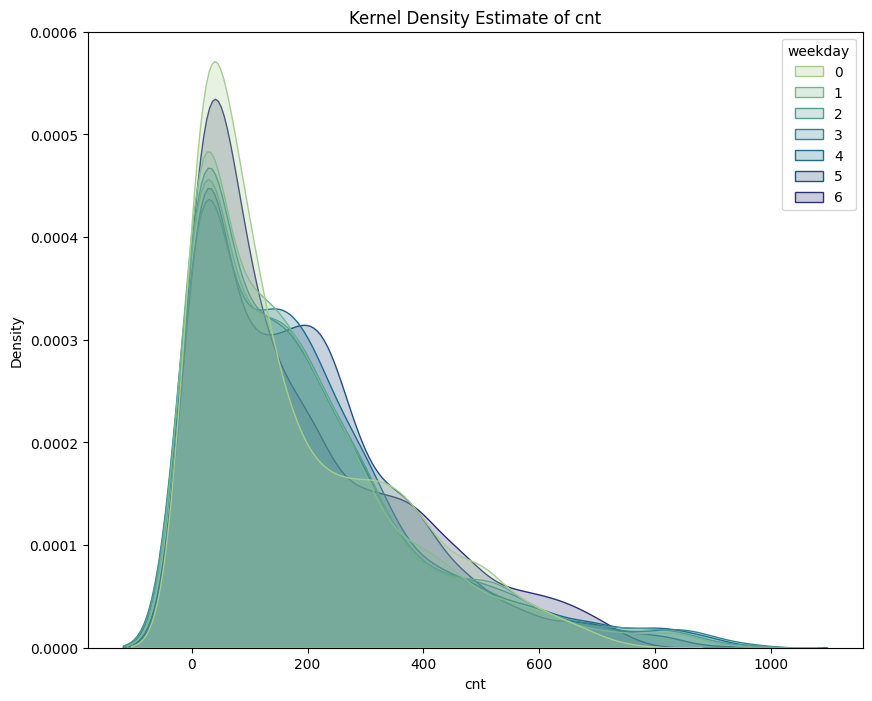

In [23]:
plot_kde(df_unclean, "cnt", hue="weekday")

I will create a weekend categorical because:
- there is a distinct difference between KDE of cnt for Saturday and Sunday compared to the rest of the days
- the difference between Saturday and Sunday does not look as distinct
- my feature selection in can drop this if needed

### Weekend

In [24]:
# Creating a weekend column
df_unclean = df_unclean.with_columns(
        pl.when((pl.col("weekday") == 0) | (pl.col("weekday") == 6))
        .then(1)
        .otherwise(0)
        .alias("weekend")
)

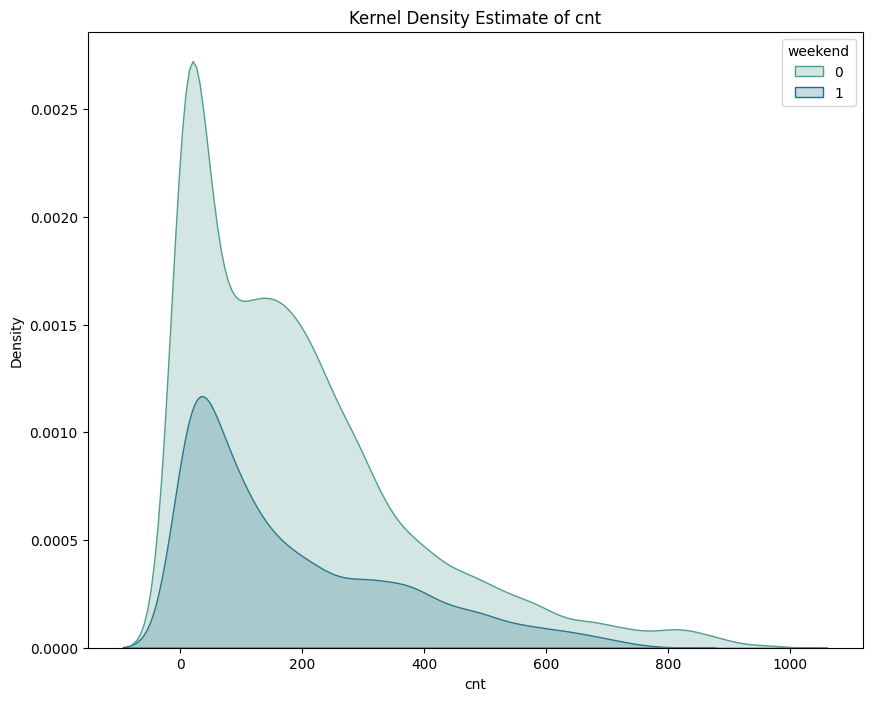

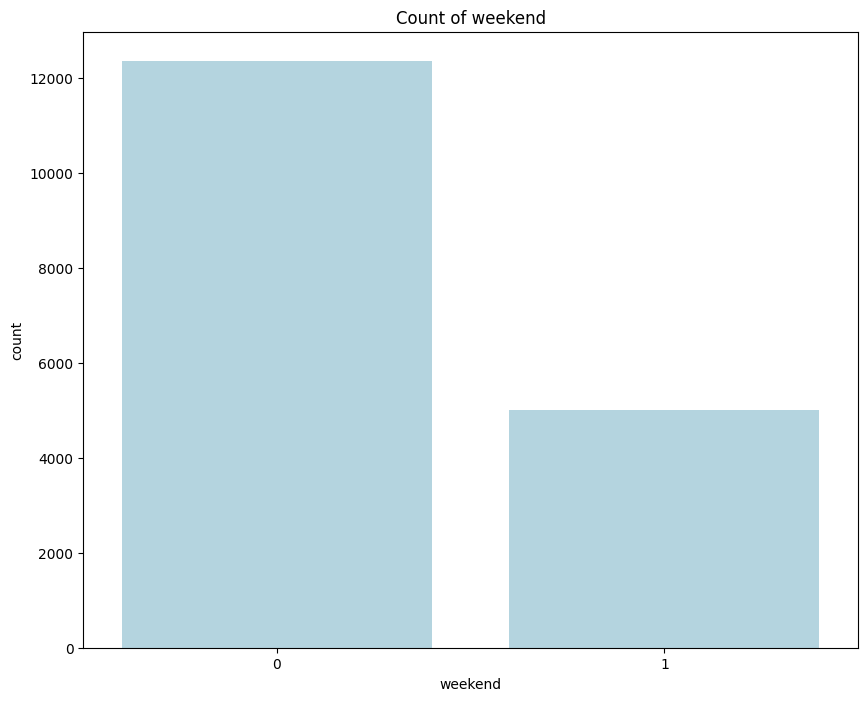

In [25]:
plot_kde(df_unclean, "cnt", hue="weekend")
plot_count(df_unclean, "weekend")

Dropping weekend because:
- KDE estimate of cnt is very similar to that of workingday (see below)
    - makes sense because they are formed similarly, and since there are few observations of holiday, this is expected
- Likely that the effects of weekend on cnt can be captured through workingday and weekday

In [26]:
df_unclean = df_unclean.drop("weekend")

### Holiday

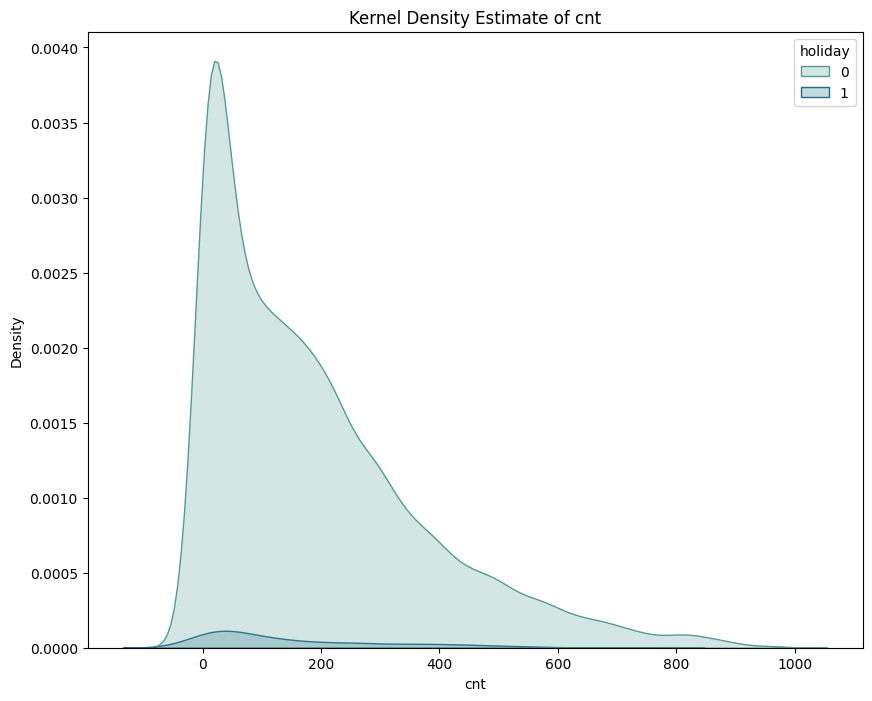

In [27]:
plot_kde(df_unclean, "cnt", hue="holiday")

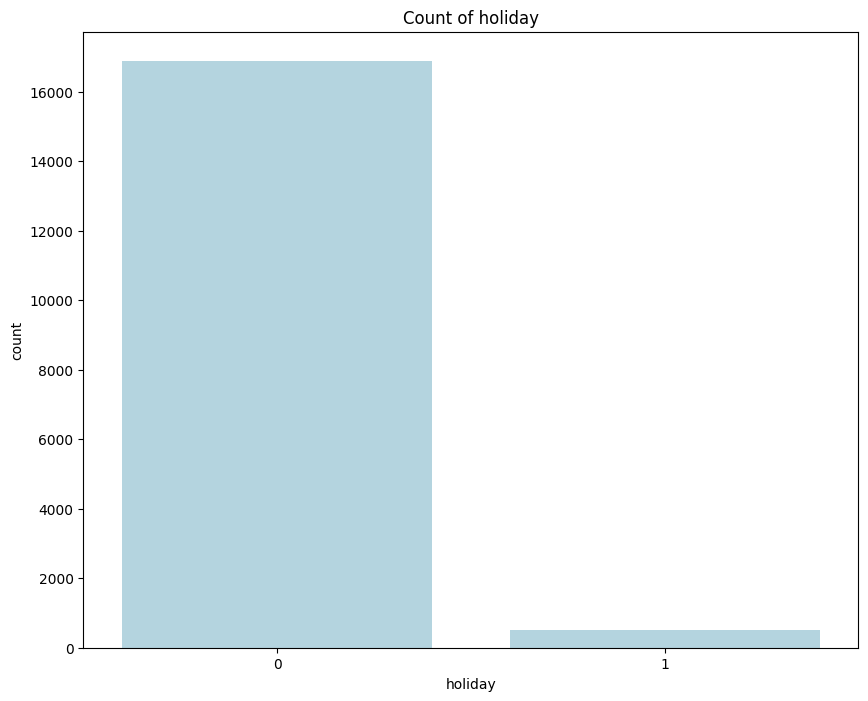

In [28]:
plot_count(df_unclean, "holiday")

Dropping holiday because:
- there are too few observations where holiday == 1, for there to be a significant effect of its variation on cnt
- likely feature selection will drop this anyway
- can get similar information from working day

### Working Day

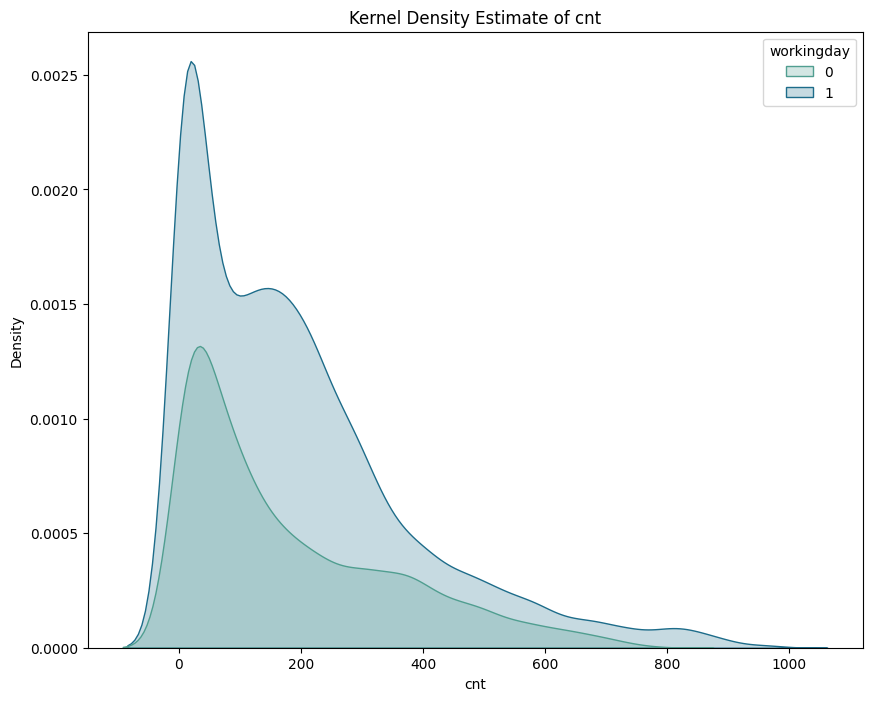

In [29]:
plot_kde(df_unclean, "cnt", hue="workingday")

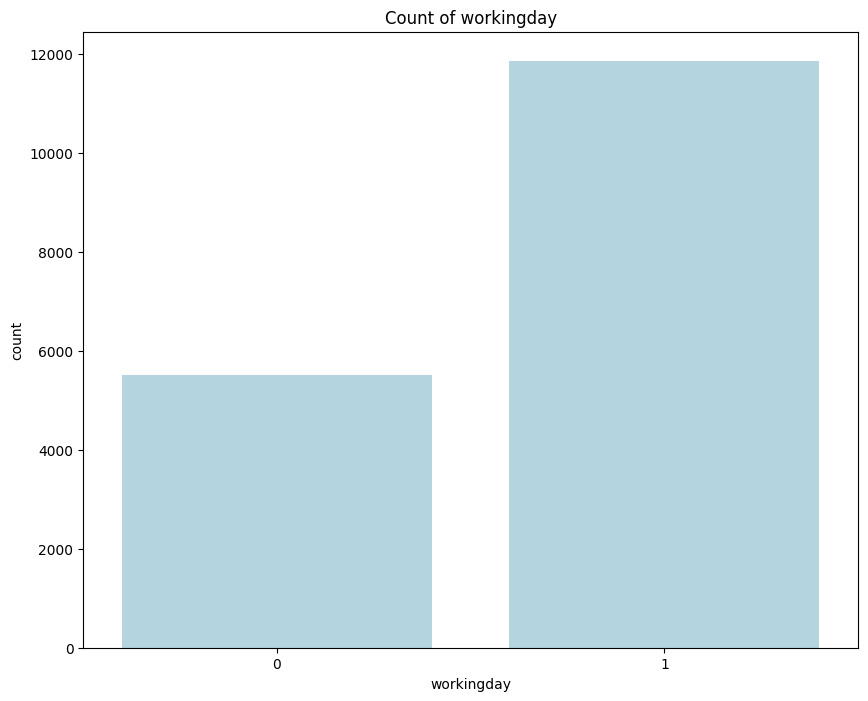

In [30]:
plot_count(df_unclean, "workingday")

Keeping workday because:
- hard to visually see if KDE of cnt changes with a change in workday
- have a significant number of observations for workday to be able to have an effect on cnt

### Weathersit

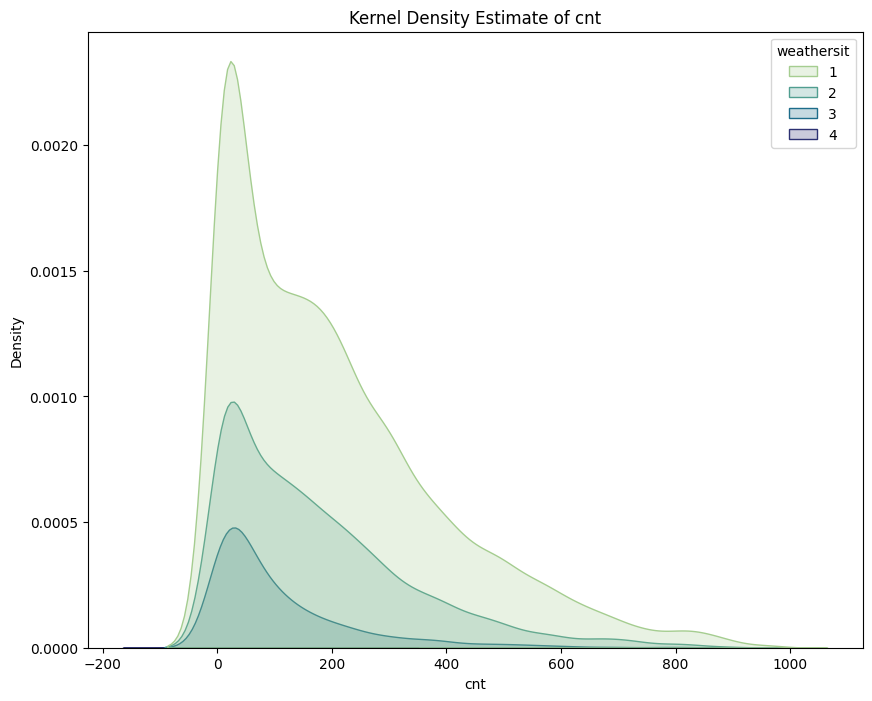

In [31]:
plot_kde(df_unclean, "cnt", hue="weathersit")

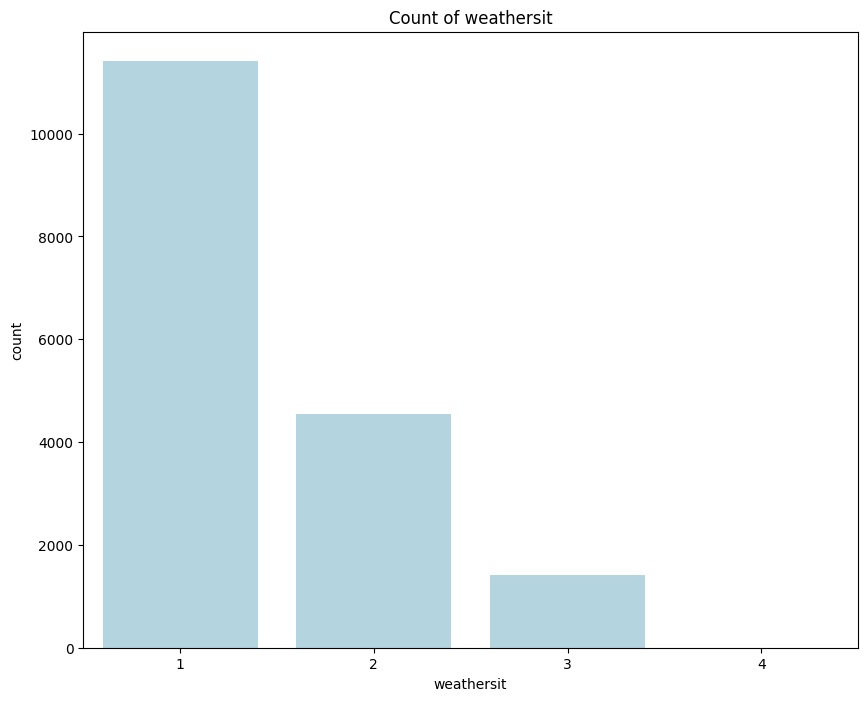

In [32]:
plot_count(df_unclean, "weathersit")

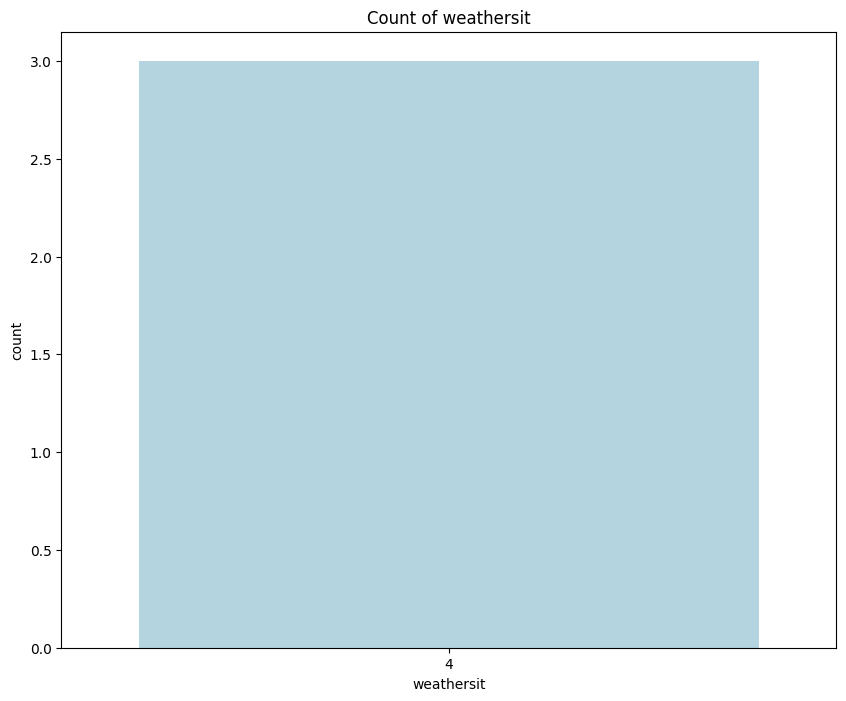

In [33]:
filtered_df = df_unclean.filter(df_unclean["weathersit"] == 4)
if not filtered_df.is_empty():
    plot_count(filtered_df, "weathersit")

Not dropping weathersit beacuse:
- Eventhough 
    - KDE of cnt seems to follow a similar pattern for weathersit == 1 ,2 ,3
    - No observations of weathersit == 4
        - This is also true for the completely raw data (i.e these instances were not accidentally dropped in cleaning)
- Since the instances for each value of weathersit is not the same, its hard to see if it has an effect on cnt
- Worst case
    - Feature selection will drop this, or at least values where weathersit == 4, since it will likely be one-hot encoded
    - I will come back and drop this

In [34]:
# Dropping day and holiday
df_unclean = df_unclean.drop("day")
df_unclean = df_unclean.drop("holiday")

## EDA: Visualisations (Bivariate)